In [7]:
import numpy as np
import pandas as pd
from IPython.display import display,Latex

#Define our target function, general regression equation, and arrays for building the data sets#
def target(x):
    return np.square(x) + 10

def sum_square_error(w,y):
    return np.square(w-y)

j = 12
test_j = 5
x_train = np.zeros(shape = (j,3))
y_train = np.zeros(shape = (j,1))

#Developing the training set#
np.random.seed(123)
get_uniform_values = np.random.uniform(-2,10,j)

for row in range(0,j):
    x_train[row] = (1,get_uniform_values[row],np.square(get_uniform_values[row]))

y_train = target(x_train[:,1])

#Developing the test set and ensuring it shares no points with the training set#
x_test = np.zeros(shape = (test_j,3))
get_uniform_values = np.random.uniform(-2,10,test_j)

for row in range(0,test_j):
    x_test[row] = (1,get_uniform_values[row],np.square(get_uniform_values[row]))
    check_for_common_values = np.isin(x_test,x_train[:,1])
    while check_for_common_values is True:
        get_uniform_values = np.random.uniform(-2,10,test_j)
        x_test[row] = (1,get_uniform_values[row],np.square(get_uniform_values[row]))

y_test = target(x_test[:,1])

x_train_display = np.column_stack((x_train[:,1],y_train))
train_df = pd.DataFrame(x_train_display,columns = ['x','y'])
print("Part a. \n\nTraining Data Set\n", train_df)

x_test_display = np.column_stack((x_test[:,1],y_test))
test_df = pd.DataFrame(x_test_display,columns = ['x','y'])
print("\n\nTest Data Set\n", test_df)

Part a. 

Training Data Set
            x           y
0   6.357630   50.419462
1   1.433672   12.055415
2   0.722217   10.521598
3   4.615777   31.305399
4   6.633628   54.005016
5   3.077278   19.469637
6   9.769170  105.436690
7   6.217957   48.662988
8   3.771183   24.221820
9   2.705410   17.319244
10  2.118136   14.486501
11  6.748596   55.543555


Test Data Set
           x          y
0  3.262867  20.646301
1 -1.283865  11.648310
2  2.776531  17.709125
3  6.855945  57.003980
4  0.189901  10.036062


In [8]:
#Get the weights for our quadratic regression#
x_train_inv = np.linalg.pinv(x_train)
weights = np.matmul(x_train_inv,y_train)

#Compute the errors over our data sets#
weighted_average_train = weighted_average_test = error_train = error_test = 0

for row in range(0,j):
    weighted_average_train = np.dot(weights,x_train[row])
    error_train += sum_square_error(weighted_average_train,y_train[row])

for row in range(0,test_j):
    weighted_average_test = np.dot(weights,x_test[row])
    error_test += sum_square_error(weighted_average_test,y_test[row])

error_train *= (1/j)
error_test *= (1/test_j)
print("Part b. \n Quadratic Regression Equation is roughly: " )
display(Latex("$\hat{y}=10x_0+0x_1+1x_1^2$"))
print("Training Error for Quadratic Regression: ", error_train)
print("Test Error for Quadratic Regression: ", error_test)

Part b. 
 Quadratic Regression Equation is roughly: 


<IPython.core.display.Latex object>

Training Error for Quadratic Regression:  9.090307164496792e-28
Test Error for Quadratic Regression:  5.086575116865085e-28


In [9]:
#####Compute the linear regresssion using ridge regression#####
def ridge_penalty(lam,w):
    return lam * np.sum(np.square(w))

#Bring x_train back down to linear terms and construct lambda to hold the penalty#
#and its associated cross validation error#
x_train = np.delete(x_train,2,1)
lam_ridge = np.array([[0.1,0],[1,0],[10,0],[100,0]])
lam_lasso = np.array([[0.1,0],[1,0],[10,0],[100,0]])

#Test each lambda on each of the cross_validation sets#
for penalty in range(0,len(lam_ridge)):
    error_cross_validate = error_train_ridge = error_test_ridge = 0
#Construct each cross validation set to test lambda on#
    k_fold = 0
    while k_fold <= 8:
        x_cross_validate = np.delete(x_train,slice(k_fold,k_fold+4),0)
        y_cross_validate = np.delete(y_train,slice(k_fold,k_fold+4),0)
        x_train_inv = np.linalg.pinv(x_cross_validate)
        weights = np.matmul(x_train_inv,y_cross_validate)
        
#Calculate the training error on each validation set#
        for row in range(0,len(x_cross_validate)):
            weighted_average_train = np.dot(weights,x_cross_validate[row])
            error_train_ridge += sum_square_error(weighted_average_train, y_cross_validate[row])
            
#Calculate the mean square error of the cross validation set#            
        error_train_ridge *= (1/len(x_cross_validate))
#Add the penalty to our training error#
        error_train_ridge += ridge_penalty(lam_ridge[penalty][0],weights)
#Add the new training error to our cross validation error#
        error_cross_validate += error_train_ridge
        
        k_fold += 4
#Take the average of the training errors and record as cross validation error#
    error_cross_validate *= (1/3)
#Store the cross validation error in the lambda array from above#
    lam_ridge[penalty][1] = error_cross_validate

#Determine which lambda gave us the best cross validation error#
error_cross_validate_ridge = np.delete(lam_ridge,0,1)
lambda_optimal = np.argmin(error_cross_validate_ridge)

#Validate our chosen model on the entire training set#
x_train_inv = np.linalg.pinv(x_train)
weights = np.matmul(x_train_inv,y_train)

for row in range(0,j):
    weighted_average_train = np.dot(weights,x_train[row])
    error_train_ridge += sum_square_error(weighted_average_train, y_train[row])

error_train_ridge *= (1/j)
error_train_ridge += ridge_penalty(lam_ridge[lambda_optimal][0],weights)
lambda_ridge_df = pd.DataFrame(lam_ridge,columns = ['lambda','Cross-Validation Error'])
print("Part c. \nCross-Validation Errors obtained during ridge regression\n\n",lambda_ridge_df, "\n\n Cross-Validation Errors obtained during lasso regression\n")

#Calculate the error on the test set#
x_test = np.delete(x_test,2,1)
for row in range(0,test_j):
    weighted_average_test = np.dot(weights,x_test[row])
    error_test_ridge += sum_square_error(weighted_average_test,y_test[row])

error_test_ridge *= (1/test_j)
error_test_ridge += ridge_penalty(lam_ridge[lambda_optimal][0],weights)

#####Compute Lasso Regression#####
def lasso_penalty(lam,w):
    return lam * np.sum(np.abs(w))

for penalty in range(0,len(lam_lasso)):
    error_cross_validate = error_train_lasso = error_test_lasso = 0
#Construct each cross validation set to test lambda on#
    k_fold = 0
    while k_fold <= 8:
        x_cross_validate = np.delete(x_train,slice(k_fold,k_fold+4),0)
        y_cross_validate = np.delete(y_train,slice(k_fold,k_fold+4),0)
        x_train_inv = np.linalg.pinv(x_cross_validate)
        weights = np.matmul(x_train_inv,y_cross_validate)
        
#Calculate the training error on each validation set#
        for row in range(0,len(x_cross_validate)):
            weighted_average_train = np.dot(weights,x_cross_validate[row])
            error_train_lasso += sum_square_error(weighted_average_train, y_cross_validate[row])
            
#Calculate the mean square error of the cross validation set#            
        error_train_lasso *= (1/len(x_cross_validate))
#Add the penalty to our training error#
        error_train_lasso += lasso_penalty(lam_lasso[penalty][0],weights)
#Add the new training error to our cross validation error#
        error_cross_validate += error_train_lasso
        
        k_fold += 4
#Take the average of the training errors and record as cross validation error#
    error_cross_validate *= (1/3)
#Store the cross validation error in the lambda array from above#
    lam_lasso[penalty][1] = error_cross_validate

#Determine which lambda gave us the best cross validation error#
error_cross_validate_ridge = np.delete(lam_lasso,0,1)
lambda_optimal = np.argmin(error_cross_validate_ridge)

del error_cross_validate_ridge, penalty, k_fold, row    

#Validate our chosen model on the entire training set#
x_train_inv = np.linalg.pinv(x_train)
weights = np.matmul(x_train_inv,y_train)

for row in range(0,j):
    weighted_average_train = np.dot(weights,x_train[row])
    error_train_lasso += sum_square_error(weighted_average_train, y_train[row])

error_train_lasso *= (1/j)
error_train_lasso += lasso_penalty(lam_lasso[lambda_optimal][0],weights)
lambda_lasso_df = pd.DataFrame(lam_lasso,columns = ['lambda','Cross-Validation Error'])
print(lambda_lasso_df)

#Calculate the error on the test set#
for row in range(0,test_j):
    weighted_average_test = np.dot(weights,x_test[row])
    error_test_lasso += sum_square_error(weighted_average_test,y_test[row])

error_test_lasso *= (1/test_j)
error_test_lasso += lasso_penalty(lam_lasso[lambda_optimal][0],weights)

print("\nPart d. \nI chose this Cross-Validation Error for Ridge Regression: ", lam_ridge[lambda_optimal][1])
print("I chose this Cross-Validation Error for Lasso Regression: ", lam_lasso[lambda_optimal][1])

Part c. 
Cross-Validation Errors obtained during ridge regression

    lambda  Cross-Validation Error
0     0.1               60.763396
1     1.0              257.761536
2    10.0             2227.742939
3   100.0            21927.556972 

 Cross-Validation Errors obtained during lasso regression

   lambda  Cross-Validation Error
0     0.1               40.779563
1     1.0               57.923206
2    10.0              229.359641
3   100.0             1943.723994

Part d. 
I chose this Cross-Validation Error for Ridge Regression:  60.76339570283858
I chose this Cross-Validation Error for Lasso Regression:  40.77956272511449


In [10]:
print("Part e.\n\nRidge Regression\nLinear Ridge Regression Equation is roughly:")
display(Latex("$$E_{ridge}=\sum_{j=1}^n(-7.818x_{0j}+9.918x_{1j}-y_j)^2+0.1((-7.818)^2+9.918^2)$$"))
print("\nTraining Error for Ridge Regression: ", error_train_ridge)
print("Test Error for Ridge Regression", error_test_ridge)
print("\n\nLasso Regression\nLinear Lasso Regression Equatin is roughly: ")
display(Latex("$$E_{lasso}=\sum_{j=1}^n(-7.818x_{0j}+9.918x_{1j}-y_j)^2+0.1(|-7.818|+|9.918|)$$"))
print("Training Error for Lasso Regression: ", error_train_lasso)
print("Test Error for Lasso Regression", error_test_lasso)

Part e.

Ridge Regression
Linear Ridge Regression Equation is roughly:


<IPython.core.display.Latex object>


Training Error for Ridge Regression:  1381.5759089148248
Test Error for Ridge Regression 280.1782039354006


Lasso Regression
Linear Lasso Regression Equatin is roughly: 


<IPython.core.display.Latex object>

Training Error for Lasso Regression:  207.50080013508762
Test Error for Lasso Regression 266.0036661747493


---------------------------------------------------------------------
Part f. I did obtain $\lambda=0.1$ analytically. I used the code to compute $$\lambda^*=\text{argmin}_\lambda\left(\dfrac{1}{k}\sum_{i=1}^kloss(g^{(D_k)},y)\right)$$

In [11]:
final_errors_ridge = np.array([lam_ridge[0][1],error_test_ridge,error_train_ridge])
final_errors_lasso = np.array([lam_lasso[0][1],error_train_lasso,error_test_lasso])

final_errors_ridge_df = pd.DataFrame([final_errors_ridge],columns = ['Cross-Validation Error','Testing Error','Training Error'],index = ['Ridge Regression'])
final_errors_lasso_df = pd.DataFrame([final_errors_lasso],columns = ['Cross-Validation Error','Training Error','Testing Error'],index = ['Lasso Regression'])
print("Part g.\n")
print(final_errors_ridge_df,"\n\n",final_errors_lasso_df)

Part g.

                  Cross-Validation Error  Testing Error  Training Error
Ridge Regression               60.763396     280.178204     1381.575909 

                   Cross-Validation Error  Training Error  Testing Error
Lasso Regression               40.779563        207.5008     266.003666


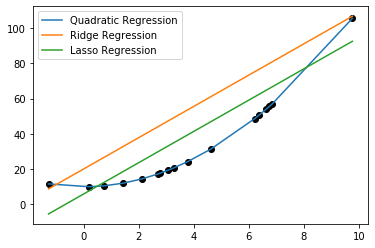

In [12]:
import matplotlib.pyplot as plt

def ridge_plot(x):
    return 4.22+8.85*x+15.949
def lasso_plot(x):
    return 4.22+8.85*x+1.774

x_vals = np.concatenate((x_train[:,1],x_test[:,1]))
y_vals = np.concatenate((y_train,y_test))
plt.scatter(x_vals,y_vals,color = "black")
x_vals = np.sort(x_vals)
target, = plt.plot(x_vals,target(x_vals))
ridge, = plt.plot(x_vals,ridge_plot(x_vals))
lasso, = plt.plot(x_vals,lasso_plot(x_vals))

plt.legend((target,ridge,lasso),('Quadratic Regression','Ridge Regression','Lasso Regression'))